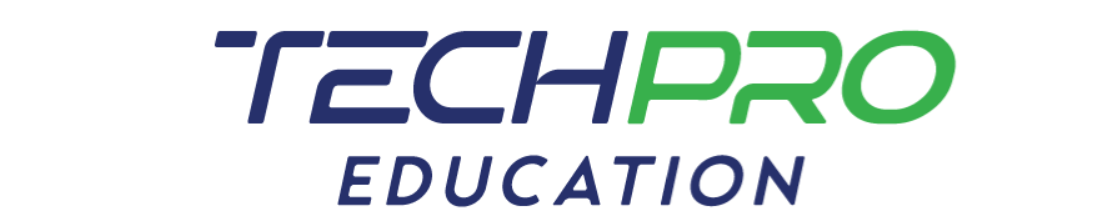

# Hierarchical Clustering - USArrest data sets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

This dataset contains the crime stats related to different states in the US.

In [2]:
df = pd.read_csv("USArrest.csv", index_col=0)   # set the first column, the state name as index

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,0.8,45,58,7.3
Alaska,2.1,46,48,7.8
Arizona,2.1,48,80,8.3
Arkansas,2.2,53,50,9.3
California,2.2,56,91,9.5


Murder: The Murder rate for every 100,000 people.

Assault: The assault rate for every 100,000 people.

UrbanPop: The urban population percentage of the state.

Rape: The rape rate for every 100,000 people.

**SCENARIO**: Let's assume that security personnel will be employed based on the crime rate in the states.

Accordingly, we are asked to cluster the states appropriately. For instance, let's assume we will classify them as **high-medium-low** crime rates and enable policymakers to develop policies accordingly.

## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


When looking at the min-max values, I noticed that different states have different crime rates. This means that in some states, crime rates are very low, while in others, they are very high.

I also realized that I need to scale based on the min-max values of the features.

**Murder (Homicide)**: The average is approximately 7.8 murders (per 100,000 people), ranging from a minimum of 0.8 to a maximum of 17.4. The standard deviation is around 4.36, indicating that **murder rates vary significantly between states**.

**Assault**: With an average of 170.76 assaults (per 100,000 people), the data shows a wide range; the minimum is 45 and the maximum is 337. The standard deviation is 83.34, **again pointing to significant variations**.

**UrbanPop (Percentage of Urban Population)**: With an average of 65.54%, it appears that most states have an above-average urban population; the minimum is 32%, and the maximum is 91%. The standard deviation is 14.47.

**Rape (Sexual Assault)**: The average is 21.23 (per 100,000 people), ranging from a minimum of 7.3 to a maximum of 46. The standard deviation is 9.37.

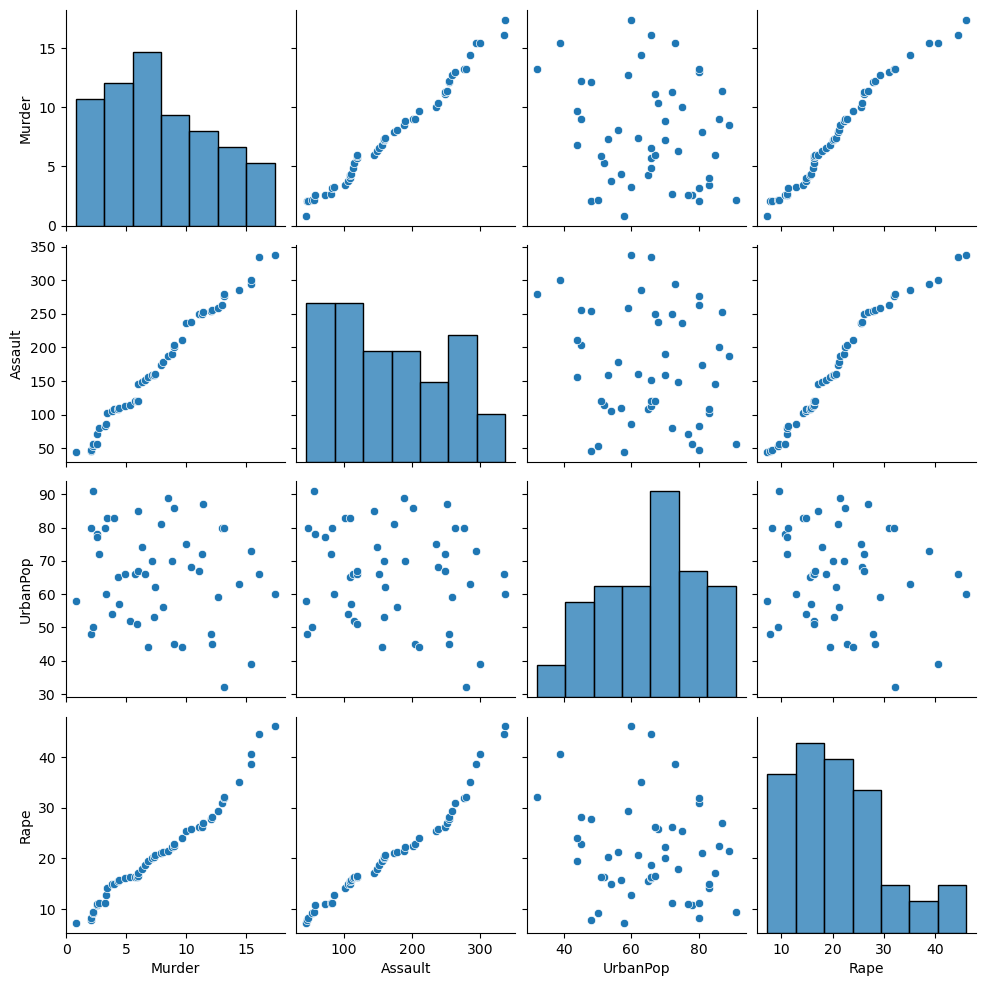

In [5]:
sns.pairplot(df);

### The overall situation of the states based on crimes

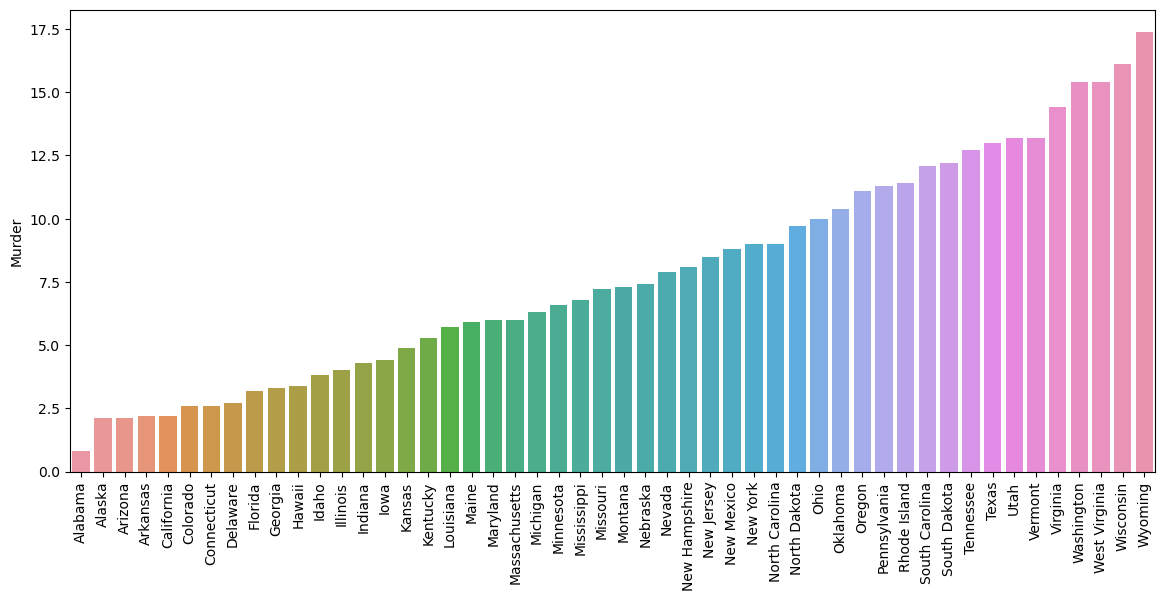

In [6]:
# based on the number of Murders

plt.figure(figsize = (14,6))
sns.barplot(y = df.Murder.sort_values(), x = df.Murder.sort_values().index)
plt.xticks(rotation = 90);

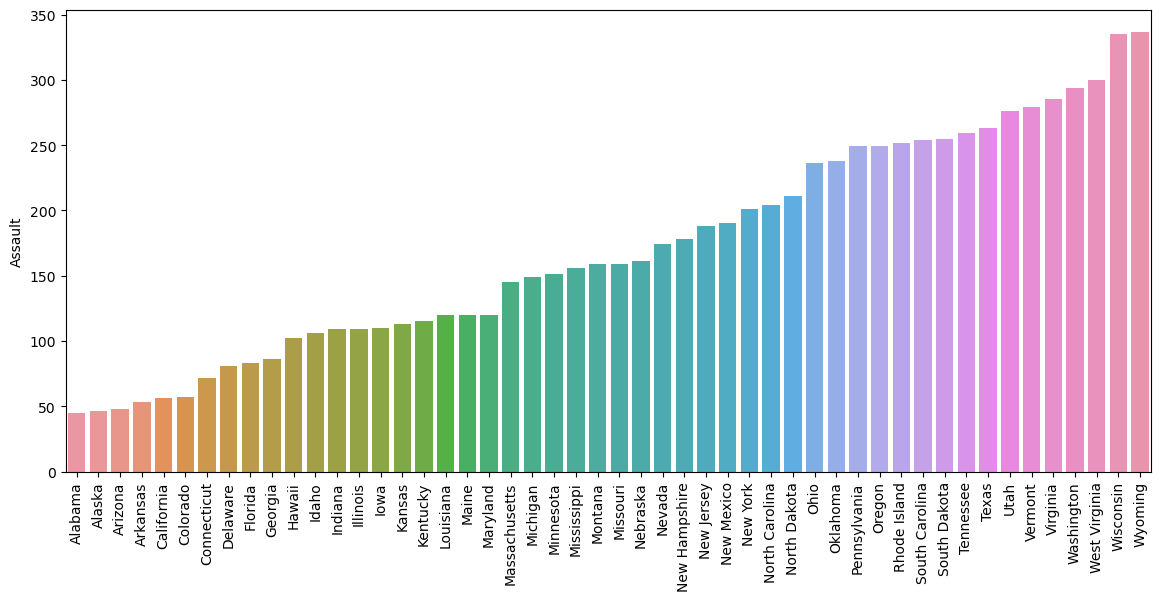

In [7]:
# States based on Assaults

plt.figure(figsize = (14,6))
sns.barplot(y = df.Assault.sort_values(), x = df.Assault.sort_values().index)
plt.xticks(rotation = 90);

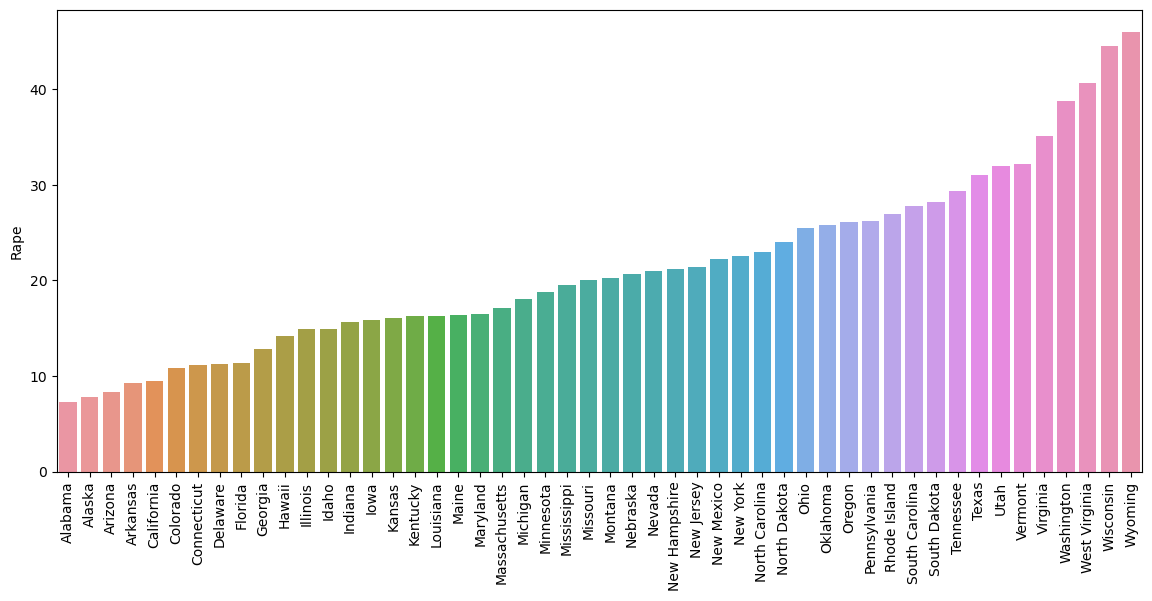

In [8]:
# States based on Rape rates
plt.figure(figsize = (14,6))
sns.barplot(y = df.Rape.sort_values(), x = df.Rape.sort_values().index)
plt.xticks(rotation = 90);

**NOTE**: The fact that the alphabetical order and the numerical order of murder rates are the same is actually an unexpected situation. Since this dataset was created for educational purposes, it may have been arranged this way.

## Hopkins Test

In [9]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [10]:
hopkins(df, df.shape[0])  # It calculates by taking all rows into account. In large datasets, calculations can be performed with subsets.

0.31799149832123186

A Hopkins value below 0.5 is acceptable, but below 0.3 indicates good clustering.

The data is not yet scaled.

## Scale

Can try both scalers.. Will continue with the best score providing technique..  As MinMax Scaler is giving us a better result, so i will continue with it

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
# creating different dataframes tp try different scaler techniques
df1 = df.copy()
df2 = df.copy()

In [14]:
hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])  # performin scaler as well as fit_transform and hopkins

0.2124262351395112

In [15]:
hopkins(StandardScaler().fit_transform(df2), df2.shape[0])

0.212565594308788

In [16]:
scaler = MinMaxScaler()

In [17]:
df_scaled = scaler.fit_transform(df)

In [18]:
# assigning the scaled data ti X

X = pd.DataFrame(df_scaled, columns=df.columns)

## Dendrogram

The tree-like hierarchical representation of clusters is called a dendrogram. It shows the arrangement of clusters produced by the relevant analyses.

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

In [20]:
# defining the metrics with linkage

hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

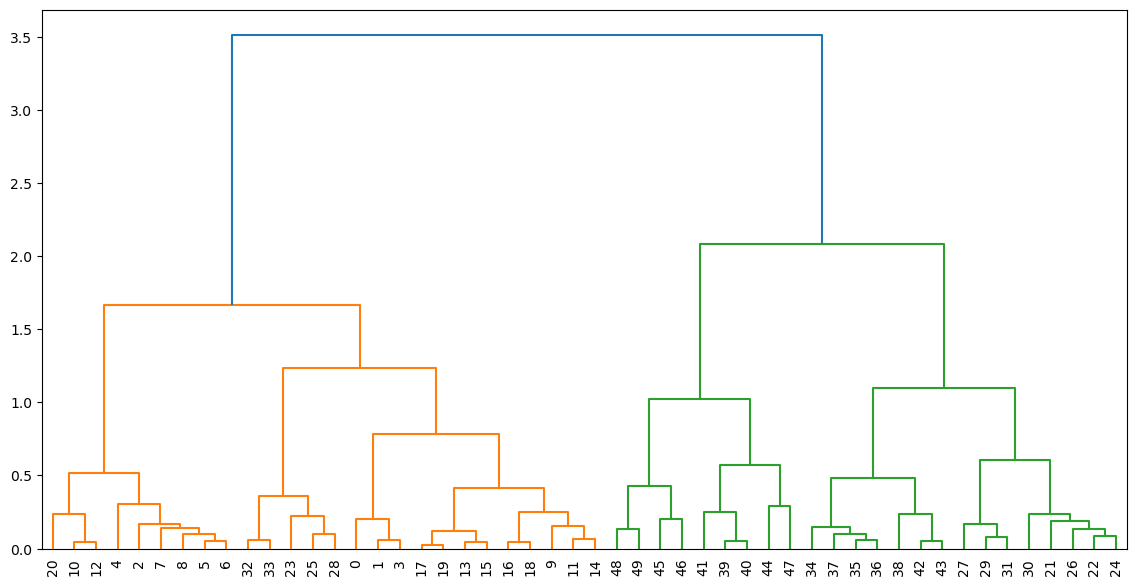

In [21]:
# plotting/visualizing dendrogram with ward

plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

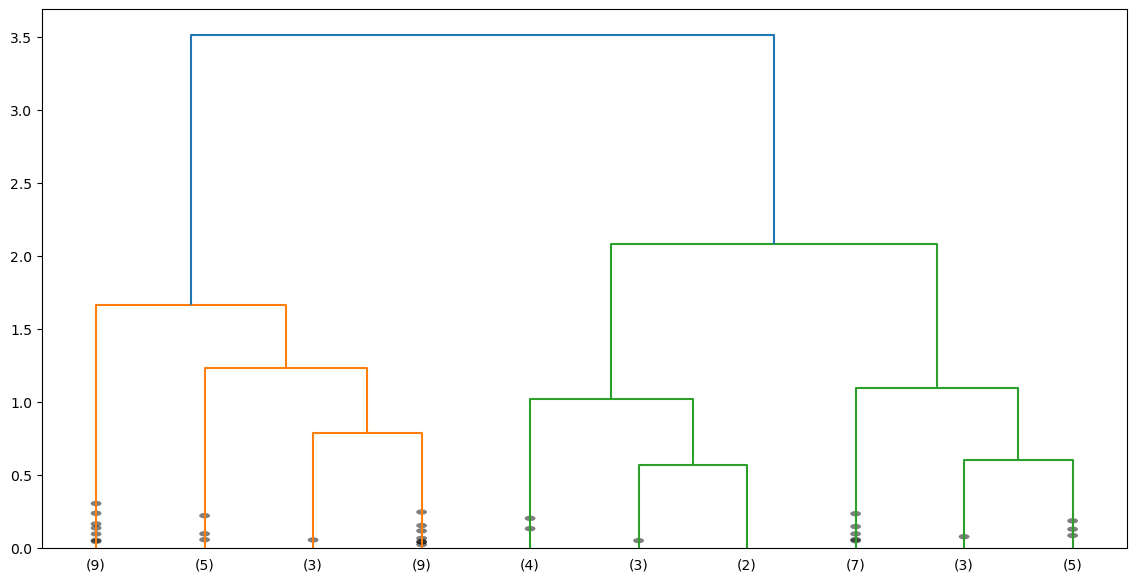

In [22]:
# let's visualize a simpler dendrogram

plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,  # adds the smaller lines under 
           leaf_font_size = 10);

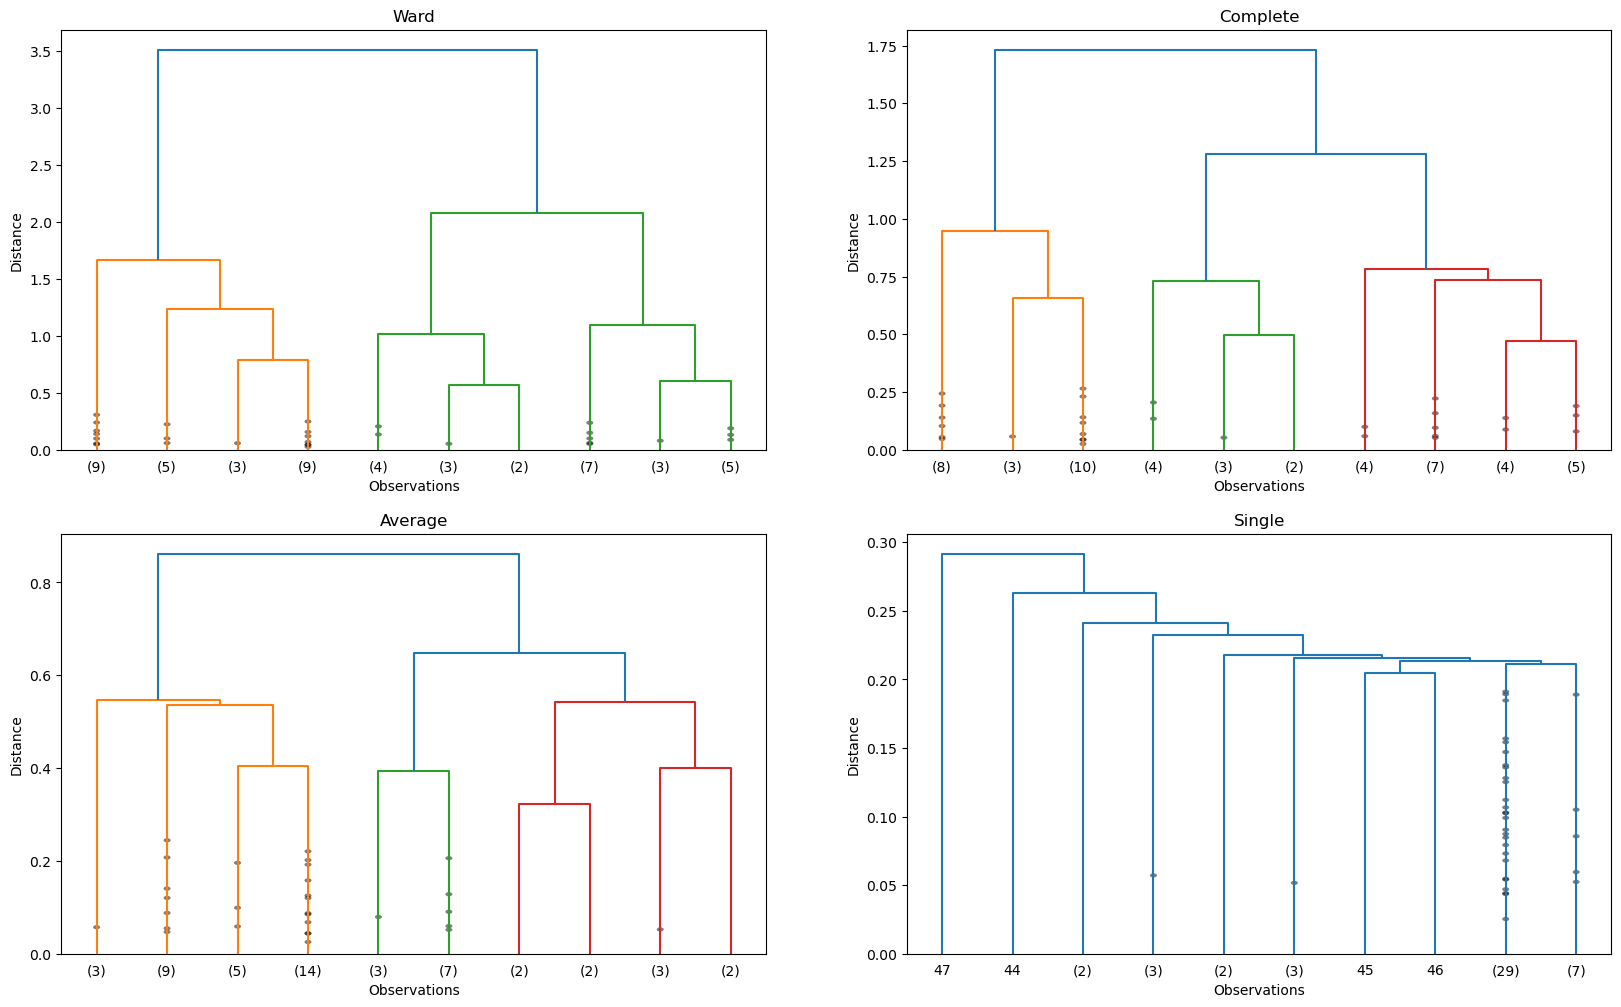

In [23]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

According to the scenario, we were asked to have 3 clusters (so we will proceed with 3 clusters). If there had been 2 clusters, we would have reported this to the authorities and asked them to reconsider their suggestion of 3 clusters.

## Hierarchical Clustering (Agglomerative)

Ideal clustering is characterized by minimum intra-cluster distance and maximum inter-cluster distance.

In [24]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.45421907210414214
Silhouette Score for 3 clusters: 0.31809021562799544
Silhouette Score for 4 clusters: 0.13602999771899238
Silhouette Score for 5 clusters: 0.1619598654325853
Silhouette Score for 6 clusters: 0.2294528193993013
Silhouette Score for 7 clusters: 0.24214267818857002
Silhouette Score for 8 clusters: 0.3051367809988359
Silhouette Score for 9 clusters: 0.29774346557180853
Silhouette Score for 10 clusters: 0.2936409237035899


In [27]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.000000,0.000000,0.440678,0.000000
1,0.078313,0.003425,0.271186,0.012920
2,0.078313,0.010274,0.813559,0.025840
3,0.084337,0.027397,0.305085,0.051680
4,0.084337,0.037671,1.000000,0.056848


creating the model with 3 clusters

In [28]:
model = AgglomerativeClustering(n_clusters=3, linkage = "ward")
clusters = model.fit_predict(X)
X["cluster"] = clusters

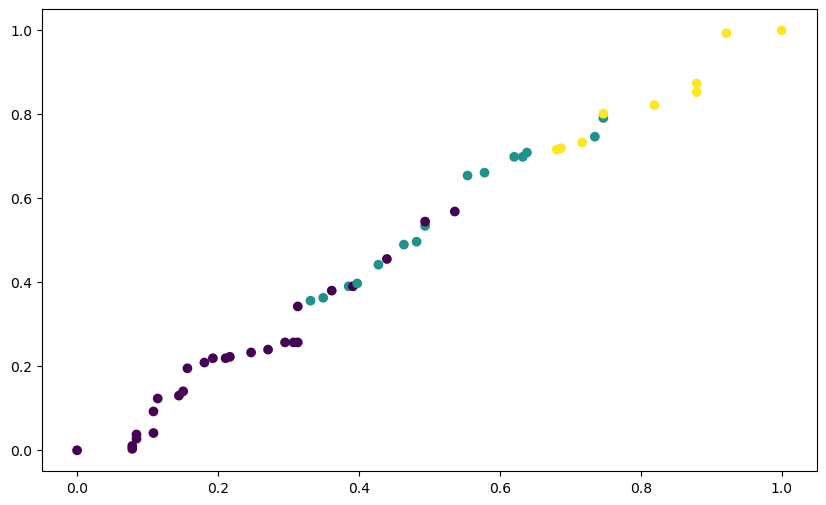

In [29]:
# Let's examine the separation between murder and assault.

plt.scatter(X.Murder, X.Assault, c = clusters, cmap = "viridis");

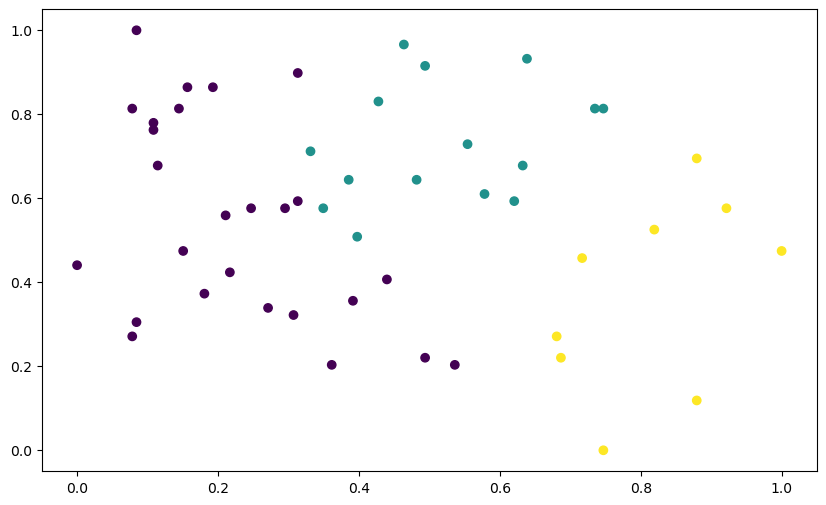

In [30]:
# murder vs urbanPop

plt.scatter(X.Murder, X.UrbanPop, c = clusters, cmap = "viridis");

My first impression is that the separation based on UrbanPop is not very good.

In [31]:
# Feature selection

clus_pred = X.groupby("cluster").mean().T
clus_pred

cluster,0,1,2
Murder,0.226135,0.522490,0.814592
Assault,0.215227,0.561872,0.834475
UrbanPop,0.543025,0.731073,0.370998
Rape,0.190320,0.428079,0.736721


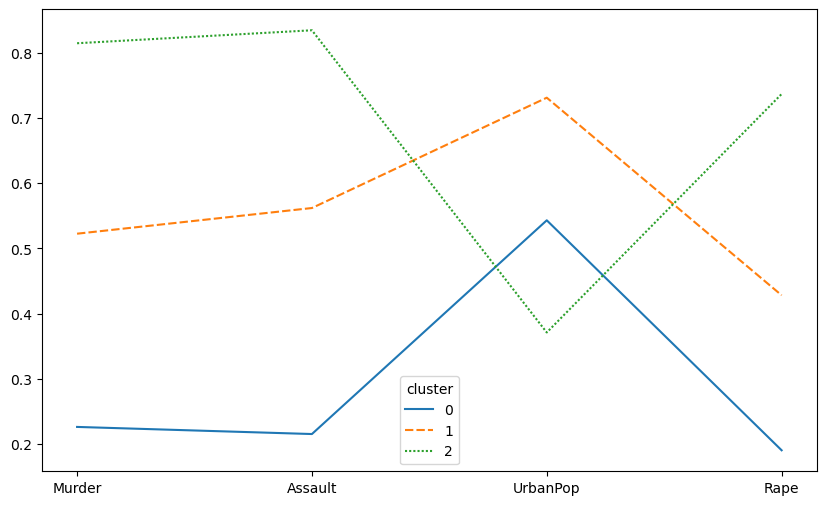

In [32]:
# feature selection with lineplot

sns.lineplot(data = clus_pred);

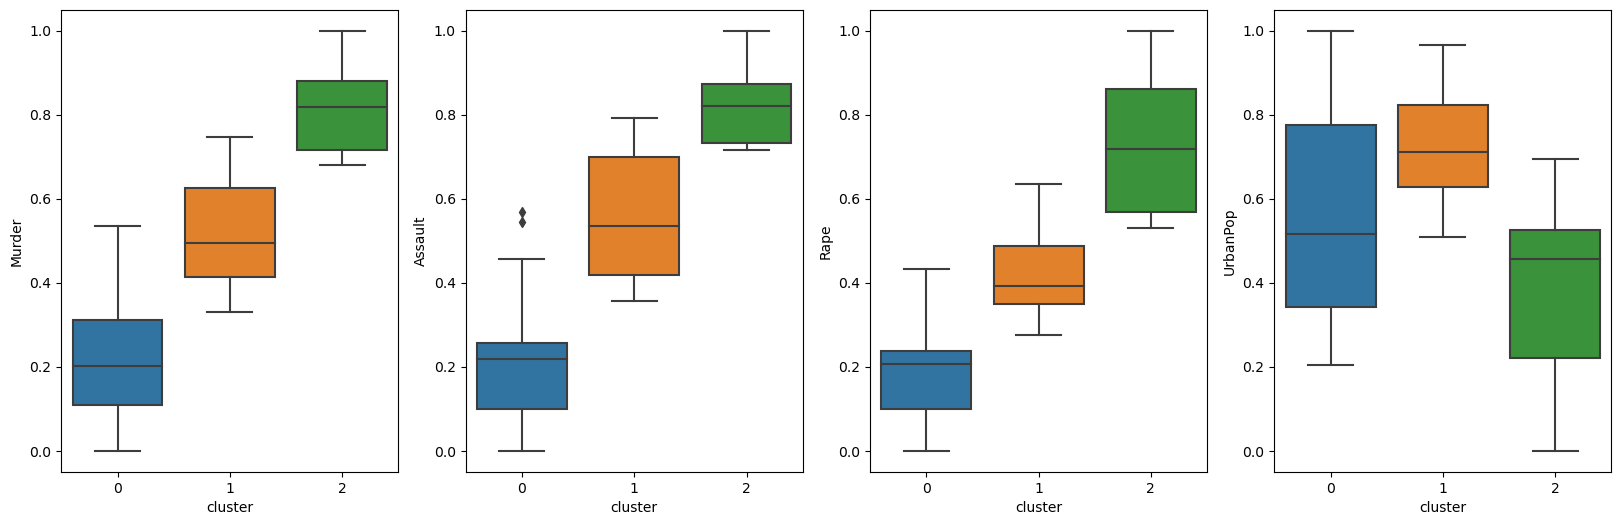

In [33]:
# feature selection with box plot

plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Murder", x = "cluster", data = X)

plt.subplot(142)
sns.boxplot(y = "Assault", x = "cluster", data = X)

plt.subplot(143)
sns.boxplot(y = "Rape", x = "cluster", data = X)

plt.subplot(144)
sns.boxplot(y = "UrbanPop", x = "cluster", data = X);

Based on the line plot and box plot, I will continue with 3 features (UrbanPop will be excluded).

In [34]:
X2 = X.iloc[:, [0,1,3]]
X2.head()

,Murder,Assault,Rape
0,0.000000,0.000000,0.000000
1,0.078313,0.003425,0.012920
2,0.078313,0.010274,0.025840
3,0.084337,0.027397,0.051680
4,0.084337,0.037671,0.056848


### Dendrogram Again

In [35]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

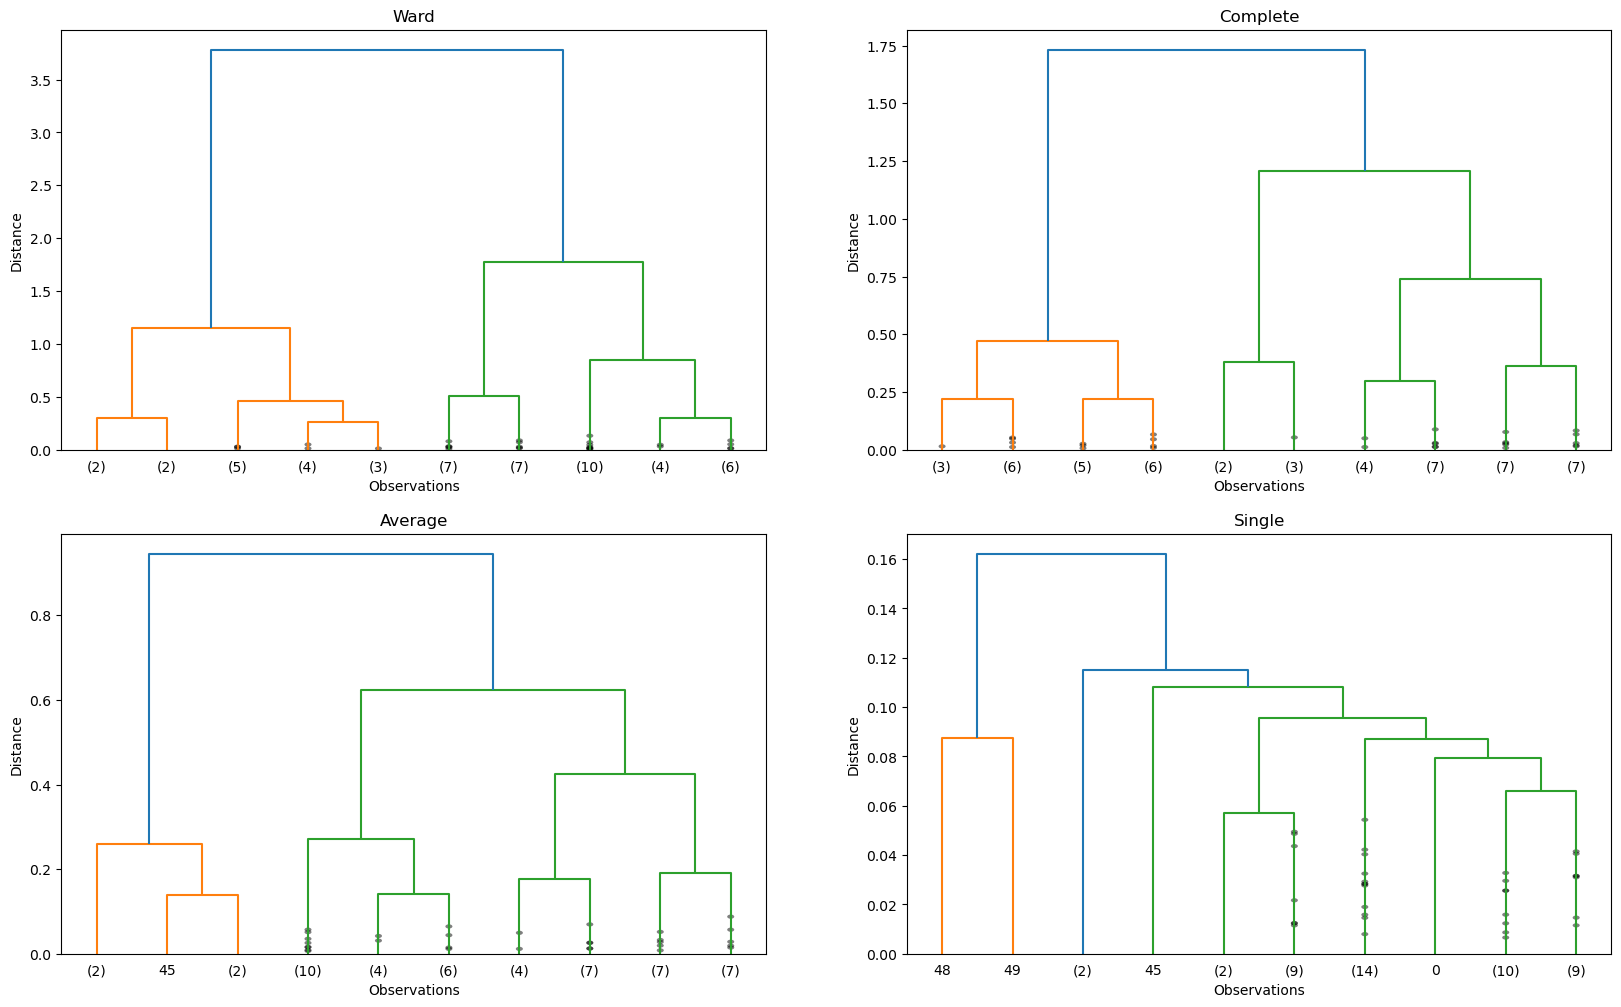

In [36]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### Silhoute Score

In [37]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.5843563041221426
Silhouette Score for 3 clusters: 0.5408473507473214
Silhouette Score for 4 clusters: 0.49680242574181394
Silhouette Score for 5 clusters: 0.4610301160129343
Silhouette Score for 6 clusters: 0.45309851046082883
Silhouette Score for 7 clusters: 0.3960415300649494
Silhouette Score for 8 clusters: 0.3968480753998706
Silhouette Score for 9 clusters: 0.3700971634671145
Silhouette Score for 10 clusters: 0.3625148731233604


## Final Model

In [38]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X2)
X2["cluster"] = clusters

<Axes: xlabel='cluster', ylabel='Rape'>

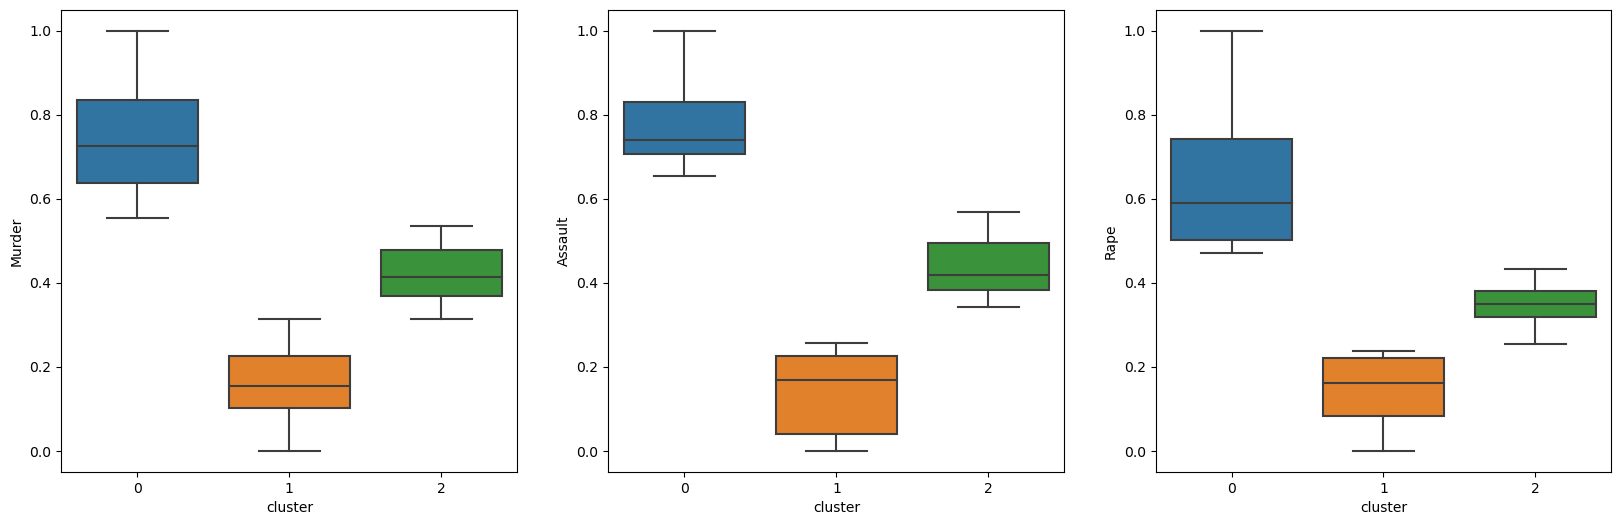

In [39]:
# Let's see that the box plots show good separation in the new situation.

plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Murder", x = "cluster", data = X2)

plt.subplot(132)
sns.boxplot(y = "Assault", x = "cluster", data = X2)

plt.subplot(133)
sns.boxplot(y = "Rape", x = "cluster", data = X2)

**Evaluation**

- 0 : states with high crime rates
- 1 : states with low crime rates
- 2 : states with medium crime rates
    
 Let's name them

0 = High

1= low

2= Medium   

In [40]:
# Let's convert the numerical values in the cluster column to categorical labels.

X2["crime_level"] = X2["cluster"].map({0:"high", 1:"low",2:"medium"})   # crime level diye bir feature olusturduk
X2.head()

,Murder,Assault,Rape,cluster,crime_level
0,0.000000,0.000000,0.000000,1,low
1,0.078313,0.003425,0.012920,1,low
2,0.078313,0.010274,0.025840,1,low
3,0.084337,0.027397,0.051680,1,low
4,0.084337,0.037671,0.056848,1,low


In [41]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [42]:
X2["States"] = df.index   # changing the indexed states back to a States column
X2

,Murder,Assault,Rape,cluster,crime_level,States
0,0.000000,0.000000,0.000000,1,low,Alabama
1,0.078313,0.003425,0.012920,1,low,Alaska
2,0.078313,0.010274,0.025840,1,low,Arizona
3,0.084337,0.027397,0.051680,1,low,Arkansas
4,0.084337,0.037671,0.056848,1,low,California
5,0.108434,0.041096,0.090439,1,low,Colorado
6,0.108434,0.092466,0.098191,1,low,Connecticut
7,0.114458,0.123288,0.100775,1,low,Delaware
8,0.144578,0.130137,0.103359,1,low,Florida
9,0.150602,0.140411,0.142119,1,low,Georgia


### Presenting States with their clusters

In [43]:
X2[X2.crime_level=="low"]["States"]  # states with low crime rates

0         Alabama
1          Alaska
2         Arizona
3        Arkansas
4      California
5        Colorado
6     Connecticut
7        Delaware
8         Florida
9         Georgia
10         Hawaii
11          Idaho
12       Illinois
13        Indiana
14           Iowa
15         Kansas
16       Kentucky
17      Louisiana
18          Maine
19       Maryland
Name: States, dtype: object

In [44]:
X2[X2.crime_level=="high"]["States"]  # states with high crime rates

34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West Virginia
48         Wisconsin
49           Wyoming
Name: States, dtype: object

**SUMMARY:** The number of clusters suggested by the dendrogram is indicated by the blue line. However, we don't make decisions based solely on the dendrogram.

The dendrogram provides a suggestion at the point where the distance between clusters is at its maximum. But for us, the intra-cluster distance must also be minimized. For this, we evaluate clustering quality using the silhouette score, which takes both distances into account.

Additionally, we need to consider the line plot and box plot as part of our decision-making process. After evaluating all these factors, we make the final decision.

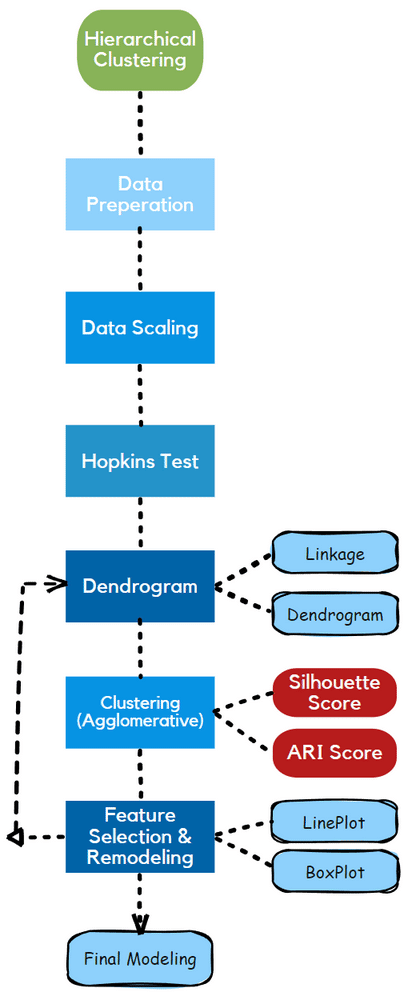